# <a style = background:lightgreen;color:black>Outcome and Duration Prediction on train_od (modeling) </a>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv('../DATA/final_train_od_dummies.csv')

You have to encode target (Outcome) labels with value between 0 and n_classes-1.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(np.array(data['Outcome']).ravel())
data['Outcome'] = le.transform(np.array(data['Outcome']).ravel())

In [4]:
X = data[['Tax Related', 'Number of Lawyers',
     'Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted', 'Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999']]

y = data[['Duration', 'Outcome']]

## <a style=background:yellow;color:black> Standardization and Split in training, validation and testing set </a>

You need to scale just the variables that are neither dummies nor boolean.

In [5]:
X_to_scale = X[['Number of Lawyers','Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted']]
X_not_to_scale = X[['Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999']]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = pd.DataFrame(y)
std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X_to_scale)

In [7]:
X_scaled_df = pd.DataFrame(X_scaled, columns=[X_to_scale.columns])
X_scaled_df = pd.concat([X_scaled_df, X_not_to_scale], axis=1)

In [8]:
new_var_names = []
for var_name in X_scaled_df.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in X_scaled_df.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

X_scaled_df = pd.DataFrame(X_scaled_df.values, columns=new_var_names)

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled_df, y, random_state=0,
                                                            test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,random_state=0,
                                                            test_size=0.2  )

In [10]:
y_train_val_duration = y_train_val['Duration']
y_train_val_Outcome = y_train_val['Outcome']
y_test_duration = y_test['Duration']
y_test_Outcome = y_test['Outcome']
y_train_duration = y_train['Duration']
y_train_Outcome = y_train['Outcome']
y_val_duration = y_val['Duration']
y_val_Outcome = y_val['Outcome']
y_train_val_duration = pd.DataFrame(y_train_val_duration)
y_train_val_Outcome = pd.DataFrame(y_train_val_Outcome)
y_test_duration = pd.DataFrame(y_test_duration)
y_test_Outcome = pd.DataFrame(y_test_Outcome)
y_train_duration = pd.DataFrame(y_train_duration)
y_train_Outcome = pd.DataFrame(y_train_Outcome )
y_val_duration = pd.DataFrame(y_val_duration)
y_val_Outcome = pd.DataFrame(y_val_Outcome)

# <a style=background:yellow;color:black> Models <a>

## <a style=background:yellow;color:black> CLASSIFICATION TASK </a>

### <a style=background:yellow;color:black> Random forest Classification</a>

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score
import matplotlib.pyplot as plt

clf = RandomForestClassifier(min_samples_leaf=100, min_samples_split=150,
 n_estimators=100, max_depth=15, class_weight='balanced', max_features='sqrt')

clf.fit(X_train_val, np.array(y_train_val_Outcome).ravel())

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=100, min_samples_split=150)

In [47]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test_Outcome, y_pred)

# MICRO
f1_micro = f1_score(y_test_Outcome, y_pred,average = 'micro')
precision_micro = precision_score(y_test_Outcome,y_pred,average = 'micro')
recall_micro = recall_score(y_test_Outcome,y_pred,average ='micro')

# MACRO
f1_macro = f1_score(y_test_Outcome, y_pred,average = 'macro')
precision_macro = precision_score(y_test_Outcome,y_pred,average = 'macro')
recall_macro = recall_score(y_test_Outcome,y_pred,average ='macro')

# WEIGHTED
f1_weighted = f1_score(y_test_Outcome, y_pred,average = 'weighted')
precision_weighted = precision_score(y_test_Outcome,y_pred,average = 'weighted')
recall_weighted = recall_score(y_test_Outcome,y_pred,average ='weighted')

print('CONFUSION MATRIX: \n {}'.format(conf_matrix))
print()
print("precision MICRO:", precision_micro)
print("recall MICRO:", recall_micro)
print("f1 score MICRO:", f1_micro)
print()
print("precision MACRO:", precision_macro)
print("recall MACRO:", recall_macro)
print("f1 score MACRO:", f1_macro)
print()
print("precision WEIGHTED:", precision_weighted)
print("recall WEIGHTED:", recall_weighted)
print("f1 score WEIGHTED:", f1_weighted)

CONFUSION MATRIX: 
 [[4385 2855 3602 3223]
 [ 110  618  218  173]
 [1147 1489 3222 2194]
 [ 191  195  331 1244]]

precision MICRO: 0.37579870619518196
recall MICRO: 0.37579870619518196
f1 score MICRO: 0.37579870619518196

precision MACRO: 0.3726563109015812
recall MACRO: 0.47464121699041284
f1 score MACRO: 0.334584979031711

precision WEIGHTED: 0.5787692621600948
recall WEIGHTED: 0.37579870619518196
f1 score WEIGHTED: 0.41028966608222234


In [ ]:
# # The following code is the same as the previous one, but by hand.

# conf_matrix = confusion_matrix(y_test_Outcome, y_pred_Outcome_rnd_for)
# print(conf_matrix)
# print()

# precisions =[] 
# recalls = []
# for i in range(4):
#     precisions.append(conf_matrix[i,i]/np.sum(conf_matrix[:,i]))
#     recalls.append(conf_matrix[i,i]/np.sum(conf_matrix[i,:]))
#     print('Precision for class {}: {}, Recall: {}'.format(i,precisions[i], recalls[i]), 'n.obs: {}'.format(np.sum(conf_matrix[i,:])))


# overall_precision_WEIGHTED = 0
# overall_precision_MACRO = 0
# overall_recall_WEIGHTED = 0
# overall_recall_MACRO = 0
# for i in range(4):
#     overall_precision_WEIGHTED += precisions[i]*np.sum(y_test_Outcome==i)/len(y_test_Outcome)
#     overall_precision_MACRO += precisions[i]/len(np.unique(y_test_Outcome))
#     overall_recall_WEIGHTED += recalls[i]*np.sum(y_test_Outcome==i)/len(y_test_Outcome)
#     overall_recall_MACRO += recalls[i]/len(np.unique(y_test_Outcome))

# T_P_micro = np.sum(np.diag(conf_matrix))
# F_P_micro = T_N_micro = np.sum(conf_matrix) - T_P_micro
# overall_precision_MICRO = overall_recall_MICRO = T_P_micro/(T_P_micro + F_P_micro)

# print()   
# print('Overall Precision WEIGHTED: {}'.format(np.array(overall_precision_WEIGHTED)))
# print('Overall Precision MACRO: {}'.format(np.array(overall_precision_MACRO)))
# print('Overall Precision MICRO: {}'.format(np.array(overall_precision_MICRO)))
# print('Overall Recall WEIGHTED: {}'.format(np.array(overall_recall_WEIGHTED)))
# print('Overall Recall MACRO: {}'.format(np.array(overall_recall_MACRO)))
# print('Overall Recall MICRO: {}'.format(np.array(overall_recall_MICRO)))

### <a style=background:yellow;color:black> XGBOOST Classification </a>

In [23]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

eval_metric = 'merror' is for multiclass classification error rate. It is calculated as #(wrong cases)/ (total cases).

In [33]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'eval_metric': 'merror' ,
    'eta': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'tree_method': 'exact',
    'verbosity': 0,
    'max_depth': 10,
    'num_class': 4}


# Define the dataset for xgboost
dtrain = xgb.DMatrix(X_train, label=y_train_Outcome)
dval = xgb.DMatrix(X_val, label=y_val_Outcome)

early_stopping_rounds = 50

xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'val')], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

In [46]:
dtest = xgb.DMatrix(X_test, label=y_test_Outcome)
y_pred = xgb_model.predict(dtest)
conf_matrix = confusion_matrix(y_test_Outcome, y_pred)

# MICRO
f1_micro = f1_score(y_test_Outcome, y_pred,average = 'micro')
precision_micro = precision_score(y_test_Outcome,y_pred,average = 'micro')
recall_micro = recall_score(y_test_Outcome,y_pred,average ='micro')

# MACRO
f1_macro = f1_score(y_test_Outcome, y_pred,average = 'macro')
precision_macro = precision_score(y_test_Outcome,y_pred,average = 'macro')
recall_macro = recall_score(y_test_Outcome,y_pred,average ='macro')

# WEIGHTED
f1_weighted = f1_score(y_test_Outcome, y_pred,average = 'weighted')
precision_weighted = precision_score(y_test_Outcome,y_pred,average = 'weighted')
recall_weighted = recall_score(y_test_Outcome,y_pred,average ='weighted')

print('CONFUSION MATRIX: \n {}'.format(conf_matrix))
print()
print("precision MICRO:", precision_micro)
print("recall MICRO:", recall_micro)
print("f1 score MICRO:", f1_micro)
print()
print("precision MACRO:", precision_macro)
print("recall MACRO:", recall_macro)
print("f1 score MACRO:", f1_macro)
print()
print("precision WEIGHTED:", precision_weighted)
print("recall WEIGHTED:", recall_weighted)
print("f1 score WEIGHTED:", f1_weighted)

CONFUSION MATRIX: 
 [[12973     2  1044    46]
 [  967     6   141     5]
 [ 6320     0  1671    61]
 [ 1482     0   294   185]]

precision MICRO: 0.588760566734135
recall MICRO: 0.588760566734135
f1 score MICRO: 0.588760566734135

precision MACRO: 0.625012762928088
recall MACRO: 0.30739702566580673
f1 score MACRO: 0.29936401615784647

precision WEIGHTED: 0.5843725875886925
recall WEIGHTED: 0.588760566734135
f1 score WEIGHTED: 0.5130402233644848


### <a style=background:yellow;color:black> Neural Network Classification </a>

In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,ConfusionMatrixDisplay
import os

In [12]:
tf.random.set_seed(42)
keras.backend.clear_session() 
np.random.seed(42)

In [13]:
def get_run_logdir(root_logdir, model_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, model_name+'_'+run_id)

model_name = input('Enter model name: ')
root_logdir = os.path.join(os.curdir,'..', 'my_logs')
run_logdir = get_run_logdir(root_logdir, model_name)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,
                                            histogram_freq=1)

In [ ]:
NN_class = keras.models.Sequential([
    keras.layers.Dense(1024,activation = 'relu',kernel_initializer='he_normal',input_shape = X_train.shape[1:]),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(56,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(4,activation = 'softmax')
])

In [ ]:
NN_class.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['Accuracy'])
history_class = NN_class.fit(X_train,y_train_Outcome,epochs = 100,validation_data = (X_val,y_val_Outcome),callbacks=[tensorboard_cb, early_stop_cb])

In [ ]:
# !tensorboard --logdir=../my_logs --port=6006

In [18]:
y_pred = np.argmax(NN_class.predict(X_test),axis=1)
conf_matrix = confusion_matrix(y_test_Outcome, y_pred)

# MICRO
f1_micro = f1_score(y_test_Outcome, y_pred,average = 'micro')
precision_micro = precision_score(y_test_Outcome,y_pred,average = 'micro')
recall_micro = recall_score(y_test_Outcome,y_pred,average ='micro')

# MACRO
f1_macro = f1_score(y_test_Outcome, y_pred,average = 'macro')
precision_macro = precision_score(y_test_Outcome,y_pred,average = 'macro')
recall_macro = recall_score(y_test_Outcome,y_pred,average ='macro')

# WEIGHTED
f1_weighted = f1_score(y_test_Outcome, y_pred,average = 'weighted')
precision_weighted = precision_score(y_test_Outcome,y_pred,average = 'weighted')
recall_weighted = recall_score(y_test_Outcome,y_pred,average ='weighted')

print('CONFUSION MATRIX: \n {}'.format(conf_matrix))
print()
print("precision MICRO:", precision_micro)
print("recall MICRO:", recall_micro)
print("f1 score MICRO:", f1_micro)
print()
print("precision MACRO:", precision_macro)
print("recall MACRO:", recall_macro)
print("f1 score MACRO:", f1_macro)
print()
print("precision WEIGHTED:", precision_weighted)
print("recall WEIGHTED:", recall_weighted)
print("f1 score WEIGHTED:", f1_weighted)

788/788 [==============================] - 2s 3ms/step
CONFUSION MATRIX: 
 [[11878    20  2055   112]
 [  869    28   209    13]
 [ 5313    12  2609   118]
 [ 1270     2   417   272]]

precision MICRO: 0.5868555780450053
recall MICRO: 0.5868555780450053
f1 score MICRO: 0.5868555780450053

precision MACRO: 0.5218620515261487
recall MACRO: 0.3330634010594489
f1 score MACRO: 0.3423966039067183

precision WEIGHTED: 0.5617734796814394
recall WEIGHTED: 0.5868555780450053
f1 score WEIGHTED: 0.5412687022490835


## <a style=background:yellow;color:black> Dealing with the unbalance problem</a>

In [12]:
train_data = pd.concat([X_train, y_train['Outcome']], axis=1, join='inner')

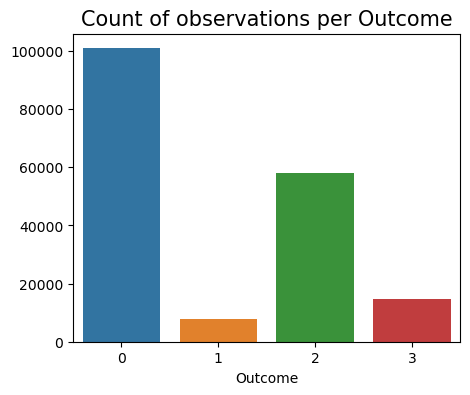

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, figsize=(5,4))
sns.countplot(x=train_data['Outcome'], ax=axs)
axs.set(ylabel='')
axs.set_title('Count of observations per Outcome', fontsize=15)
plt.show()

In [14]:
df_class_0 = train_data[train_data.Outcome==0]
df_class_1 = train_data[train_data.Outcome==1]
df_class_2 = train_data[train_data.Outcome==2]
df_class_3 = train_data[train_data.Outcome==3]

New sample size equal to lowest sample's size to avoid synthetic data (we already have a lot of data) 

In [15]:
min_sample_nbr = min(train_data['Outcome'].value_counts().tolist())

#We perform the resampling 
df_class3_downsampled = df_class_3.sample(n = min_sample_nbr)
df_class2_downsampled = df_class_2.sample(n = min_sample_nbr)
df_class0_downsampled = df_class_0.sample(n = min_sample_nbr)

#We re-assemble the resampled dataframes and shuffle them
data_balanced = pd.concat([df_class3_downsampled,df_class0_downsampled, df_class2_downsampled, df_class_1], ignore_index=True)
data_balanced = data_balanced.sample(frac = 1, random_state = 1).reset_index()

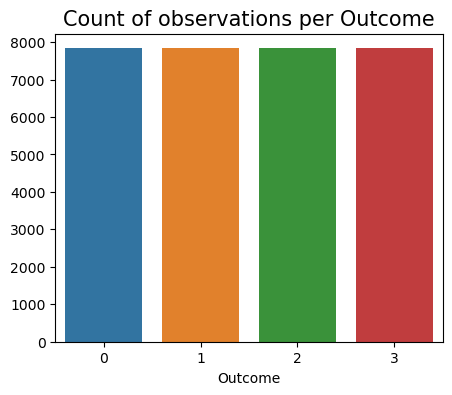

In [16]:
f, axs = plt.subplots(1, figsize=(5,4))
sns.countplot(x=data_balanced['Outcome'], ax=axs)
axs.set(ylabel='')
axs.set_title('Count of observations per Outcome', fontsize=15)
plt.show()

In [17]:
del data_balanced['index'] #not always necessary

In [18]:
X_train_balanced = data_balanced[['Number of Lawyers','Number of Legal Parties', 
       'Value formatted','Unified Contribution formatted', 'Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002',
       'OSA-180099','OSA-180001','OSA-140999','OSA-145999']]
y_train_Outcome_balanced = data_balanced['Outcome']

### <a style=background:yellow;color:black> XGBOOST Unbalance problem</a>

In [31]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt

In [32]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'eval_metric': 'merror' ,
    'eta': 0.01,
    'subsample': 1,
    'colsample_bytree': 0.5,
    'tree_method': 'exact',
    'verbosity': 0,
    'max_depth': 10,
    'num_class': 4}


# Define the dataset for xgboost
dtrain = xgb.DMatrix(X_train_balanced, label=y_train_Outcome_balanced)
dval = xgb.DMatrix(X_val, label=y_val_Outcome)

early_stopping_rounds = 50

xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'val')], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

In [ ]:
dtest = xgb.DMatrix(X_test)
y_pred = xgb_model.predict(dtest)
conf_matrix = confusion_matrix(y_test_Outcome, y_pred)

# MICRO
f1_micro = f1_score(y_test_Outcome, y_pred,average = 'micro')
precision_micro = precision_score(y_test_Outcome,y_pred,average = 'micro')
recall_micro = recall_score(y_test_Outcome,y_pred,average ='micro')

# MACRO
f1_macro = f1_score(y_test_Outcome, y_pred,average = 'macro')
precision_macro = precision_score(y_test_Outcome,y_pred,average = 'macro')
recall_macro = recall_score(y_test_Outcome,y_pred,average ='macro')

# WEIGHTED
f1_weighted = f1_score(y_test_Outcome, y_pred,average = 'weighted')
precision_weighted = precision_score(y_test_Outcome,y_pred,average = 'weighted')
recall_weighted = recall_score(y_test_Outcome,y_pred,average ='weighted')

print('CONFUSION MATRIX: \n {}'.format(conf_matrix))
print()
print("precision MICRO:", precision_micro)
print("recall MICRO:", recall_micro)
print("f1 score MICRO:", f1_micro)
print()
print("precision MACRO:", precision_macro)
print("recall MACRO:", recall_macro)
print("f1 score MACRO:", f1_macro)
print()
print("precision WEIGHTED:", precision_weighted)
print("recall WEIGHTED:", recall_weighted)
print("f1 score WEIGHTED:", f1_weighted)

### <a style=background:yellow;color:black> Neural Network Unbalance problem</a>

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
tf.random.set_seed(42)
keras.backend.clear_session() 
np.random.seed(42)

In [41]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.025)

def get_run_logdir(root_logdir, model_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, model_name+'_'+run_id)

model_name = input('Enter model name: ')
root_logdir = os.path.join(os.curdir,'..', 'my_logs')
run_logdir = get_run_logdir(root_logdir, model_name)

lr_schedule_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,
                                            histogram_freq=1)

In [42]:
NN_class = keras.models.Sequential([
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal',input_shape = X_train.shape[1:]),
    keras.layers.Dense(512,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(64,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(32,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(4,activation = 'softmax')
])


In [ ]:
NN_class.compile(loss = "sparse_categorical_crossentropy",optimizer = keras.optimizers.Adam(learning_rate=0.01),metrics = ['Accuracy'])
history_class = NN_class.fit(X_train_balanced,y_train_Outcome_balanced,epochs = 100,validation_data = (X_val,y_val_Outcome),callbacks=[tensorboard_cb, early_stop_cb,lr_schedule_cb])

In [45]:
# NN_class.save('../models/Neural_Network_classification_train_od.h5')

In [44]:
y_pred = np.argmax(NN_class.predict(X_test),axis=1)
conf_matrix = confusion_matrix(y_test_Outcome, y_pred)

# MICRO
f1_micro = f1_score(y_test_Outcome, y_pred,average = 'micro')
precision_micro = precision_score(y_test_Outcome,y_pred,average = 'micro')
recall_micro = recall_score(y_test_Outcome,y_pred,average ='micro')

# MACRO
f1_macro = f1_score(y_test_Outcome, y_pred,average = 'macro')
precision_macro = precision_score(y_test_Outcome,y_pred,average = 'macro')
recall_macro = recall_score(y_test_Outcome,y_pred,average ='macro')

# WEIGHTED
f1_weighted = f1_score(y_test_Outcome, y_pred,average = 'weighted')
precision_weighted = precision_score(y_test_Outcome,y_pred,average = 'weighted')
recall_weighted = recall_score(y_test_Outcome,y_pred,average ='weighted')

print('CONFUSION MATRIX: \n {}'.format(conf_matrix))
print()
print("precision MICRO:", precision_micro)
print("recall MICRO:", recall_micro)
print("f1 score MICRO:", f1_micro)
print()
print("precision MACRO:", precision_macro)
print("recall MACRO:", recall_macro)
print("f1 score MACRO:", f1_macro)
print()
print("precision WEIGHTED:", precision_weighted)
print("recall WEIGHTED:", recall_weighted)
print("f1 score WEIGHTED:", f1_weighted)

 50/788 [>.............................] - ETA: 2s

2023-01-16 18:53:29.922077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


788/788 [==============================] - 2s 3ms/step
CONFUSION MATRIX: 
 [[5525 2112 5282 1146]
 [ 288  514  269   48]
 [2958  928 3389  777]
 [ 264   96  903  698]]

precision MICRO: 0.40187323887764415
recall MICRO: 0.40187323887764415
f1 score MICRO: 0.4018732388776442

precision MACRO: 0.33953986900977345
recall MACRO: 0.40724695405759775
f1 score MACRO: 0.34354767323207064

precision WEIGHTED: 0.4779803426261784
recall WEIGHTED: 0.40187323887764415
f1 score WEIGHTED: 0.4210959165076711


In [ ]:
# !tensorboard --logdir=../my_logs --port=6006

#### <a style=background:yellow;color:black> Classification task with Pytorch </a>

## <a style=background:yellow;color:black> REGRESSION TASK </a>

### <a style=background:yellow;color:black> Random forest Regression</a>

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [37]:
rnd_reg = RandomForestRegressor(n_estimators=300,random_state = 42)

rnd_reg.fit(X_train_val, y_train_val_duration)

y_pred_duration_rnd_for = rnd_reg.predict(X_test)

print(mean_absolute_error(y_test_duration,y_pred_duration_rnd_for))

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_3320/3614527034.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_reg.fit(X_train_val, y_train_val_duration)


233.22475564117414


In [ ]:
import joblib

# joblib.dump(rnd_reg, '../models/rnd_for_reg_train_od.sav')
# rnd_reg = joblib.load('../models/rnd_for_reg_train_od.sav')

### <a style=background:yellow;color:black> XGBOOST Regression </a>

In [43]:
import xgboost
from sklearn.metrics import mean_absolute_error

In [ ]:
xgb_reg = xgboost.XGBRegressor(n_estimators = 300,random_state = 42,eval_metric = 'mae')
xgb_reg.fit(X_train,y_train_duration,eval_set = [(X_val,y_val_duration)],early_stopping_rounds = 15)

In [48]:
params = {
    'booster': 'gbtree',
    'learning_rate': 0.05,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'eta': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'tree_method': 'exact',
    'verbosity': 0,
    'max_depth': 10,
}

# Define the dataset for xgboost
dtrain = xgb.DMatrix(X_train, label=y_train_duration)
dval = xgb.DMatrix(X_val, label=y_val_duration)

early_stopping_rounds = 50

model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'val')], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

In [49]:
dtest = xgb.DMatrix(X_test)
y_pred_duration_xgb = model.predict(dtest)
mean_absolute_error(y_test_duration,y_pred_duration_xgb)

214.14003181480228

### <a style=background:yellow;color:black> Neural Network Regression</a>

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error

In [20]:
tf.random.set_seed(42)
keras.backend.clear_session() 
np.random.seed(42)

In [21]:
def get_run_logdir(root_logdir, model_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, model_name+'_'+run_id)

model_name = input('Enter model name: ')
root_logdir = os.path.join(os.curdir,'..', 'my_logs')
run_logdir = get_run_logdir(root_logdir, model_name)

early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,
                                            histogram_freq=1)

In [22]:
NN_reg = keras.models.Sequential([
    keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_normal',input_shape = X_train.shape[1:]),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(512, kernel_initializer='he_normal',activation='relu'),
    keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(1,activation = 'relu') #relu because i want only positive numbers
])

In [ ]:
NN_reg.compile(loss = 'mean_absolute_error',optimizer = 'adam')
history_reg = NN_reg.fit(X_train,y_train_duration,epochs = 100,validation_data = (X_val,y_val_duration), callbacks=[tensorboard_cb, early_stop_cb])

In [ ]:
# !tensorboard --logdir=../my_logs --port=6006

In [56]:
# NN_reg.save('../models/Neural_Network_regression_train_od.h5')

In [27]:
NN_reg = keras.models.load_model('../models/Neural_Network_regression_train_od.h5')

In [28]:
y_pred_duration_NN = NN_reg.predict(X_test)
mean_absolute_error(y_test_duration,y_pred_duration_NN)

 59/788 [=>............................] - ETA: 1s

2023-01-16 16:11:36.665271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


788/788 [==============================] - 2s 2ms/step


212.0404718248183

# <a style=background:yellow;color:black> test_od predictions</a>

<a style =color:deepskyblue>**PROBLEMS:**</a> 

*  We have a different number of columns among the training set on which we trained the models and the blind_test_od_scaled. It is a problem because we need to have the same number of columns that we had in the training set otherwise we can't use the model to make predictions on the blind test set. We solve this problem by adding a column of zeros to the blind_test_od_scaled.

* There are some NA in the blind_test_od_scaled. We solve this problem in two ways:
    * by replacing the NA according to the table of value and unified contribution we have in the preprocessing notebook. 
    * by deleting them.

In [4]:
X_train_val_columns = ['Number of Lawyers', 'Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted', 'Tax Related', 'Milano', 'Bari',
       'Bologna', 'Genova', 'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma',
       "L'Aquila", 'Potenza', 'Perugia', 'Campobasso', 'Firenze', 'Cagliari',
       'Venezia', 'Cosenza', 'Ancona', 'Trieste', 'Aosta', 'OR-140999',
       'OR-145009', 'OR-139999', 'OR-145999', 'OR-130099', 'OR-101003',
       'OR-130121', 'OR-130111', 'OR-130131', 'OR-101002', 'OR-180002',
       'OSA-180002', 'OSA-180099', 'OSA-180001', 'OSA-140999', 'OSA-145999']

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


blind_test_od = pd.read_csv('../DATA/test_od.csv')

del blind_test_od['Unnamed: 0']

blind_test_od['Value formatted'] = pd.to_numeric(blind_test_od['Value']\
    .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
    
del blind_test_od['Value']

blind_test_od['Unified Contribution formatted'] = pd.to_numeric(blind_test_od['Unified Contribution']\
    .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
    
del blind_test_od['Unified Contribution']

city_encoder = OneHotEncoder().fit(blind_test_od[['City of the judge’s office']])

blind_test_od = pd.concat([blind_test_od,
  pd.DataFrame(city_encoder.transform(blind_test_od[['City of the judge’s office']]).toarray(),columns=city_encoder.categories_)],
  axis=1).drop(['City of the judge’s office'],axis=1)

object_encoder = OneHotEncoder().fit(blind_test_od[['Object']])

blind_test_od = pd.concat([blind_test_od,
  pd.DataFrame(object_encoder.transform(blind_test_od[['Object']]).toarray(),columns=object_encoder.categories_)],
  axis=1).drop(['Object'],axis=1)

blind_test_od['Tax Related'] = blind_test_od['Tax Related'].fillna(0).replace(True, 1)

new_var_names = []
for var_name in blind_test_od.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in blind_test_od.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

blind_test_od = pd.DataFrame(blind_test_od.values, columns=new_var_names)

del blind_test_od['Date']
del blind_test_od['Case identifier']
del blind_test_od['Judge Identifier']
del blind_test_od['Section']
del blind_test_od['Primary Actor']
del blind_test_od['Secondary Actor']
del blind_test_od['Primary Defendant']
del blind_test_od['Secondary Defendant']
del blind_test_od['Number of Persons']

for col in X_train_val_columns:
    if col not in blind_test_od.columns:
        blind_test_od[col] = 0.0

blind_test_od_to_scale = blind_test_od[['Number of Lawyers','Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted']]
blind_test_od_not_to_scale = blind_test_od[['Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999','ID']]



std_scale = StandardScaler()
blind_test_od_scaled = std_scale.fit_transform(blind_test_od_to_scale)

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled, columns=[blind_test_od_to_scale.columns])
blind_test_od_scaled = pd.concat([blind_test_od_scaled, blind_test_od_not_to_scale], axis=1)

new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled.values, columns=new_var_names)

blind_test_od_to_scale = blind_test_od[['Number of Lawyers','Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted']]
blind_test_od_not_to_scale = blind_test_od[['Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999','ID']]



std_scale = StandardScaler()
blind_test_od_scaled = std_scale.fit_transform(blind_test_od_to_scale)

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled, columns=[blind_test_od_to_scale.columns])
blind_test_od_scaled = pd.concat([blind_test_od_scaled, blind_test_od_not_to_scale], axis=1)

new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled.values, columns=new_var_names)

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/3803149581.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/3803149581.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')


<a style=color:deepskyblue> Let's start by deleting the NA values</a>

In [6]:
blind_test_od_scaled_cleaned = blind_test_od_scaled.dropna()

In [7]:
from tensorflow import keras

NN_clf = keras.models.load_model('../models/Neural_Network_classification_train_od.h5')
NN_reg = keras.models.load_model('../models/Neural_Network_regression_train_od.h5')

In [8]:
for col in X_train_val_columns:
    blind_test_od_scaled_cleaned[col] = blind_test_od_scaled_cleaned[col].astype(pd.np.float64)

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/2433675451.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  blind_test_od_scaled_cleaned[col] = blind_test_od_scaled_cleaned[col].astype(pd.np.float64)
/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/2433675451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind_test_od_scaled_cleaned[col] = blind_test_od_scaled_cleaned[col].astype(pd.np.float64)


In [ ]:
y_pred_Outcome = np.argmax(NN_clf.predict(blind_test_od_scaled_cleaned.drop('ID',axis=1)), axis=1)
y_pred_Duration = NN_reg.predict(blind_test_od_scaled_cleaned.drop('ID',axis=1)).ravel()

prediction_outcome_duration_2 = pd.DataFrame({'ID':blind_test_od_scaled_cleaned['ID'], 'Outcome':y_pred_Outcome, 'Duration':y_pred_Duration})
prediction_outcome_duration_2['Outcome'] = prediction_outcome_duration_2['Outcome'].astype(pd.np.int)
prediction_outcome_duration_2['Duration'] = prediction_outcome_duration_2['Duration'].astype(pd.np.int)

# prediction_outcome_duration_2.to_csv('../predictions/prediction_outcome_duration_2.csv', index=False)

<a style=color:deepskyblue>Let's now make the csv prediction with replacing the NA</a>

In [10]:
X_train_val_columns = ['Number of Lawyers', 'Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted', 'Tax Related', 'Milano', 'Bari',
       'Bologna', 'Genova', 'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma',
       "L'Aquila", 'Potenza', 'Perugia', 'Campobasso', 'Firenze', 'Cagliari',
       'Venezia', 'Cosenza', 'Ancona', 'Trieste', 'Aosta', 'OR-140999',
       'OR-145009', 'OR-139999', 'OR-145999', 'OR-130099', 'OR-101003',
       'OR-130121', 'OR-130111', 'OR-130131', 'OR-101002', 'OR-180002',
       'OSA-180002', 'OSA-180099', 'OSA-180001', 'OSA-140999', 'OSA-145999']

In [11]:
import pandas as pd
import numpy as np

def unified_contribution_calculator(in_array):
    out_array = list(in_array*0.5)+list(in_array*1)+list(in_array*1.5)+list(in_array*2)
    return np.sort(np.array(out_array))

table_range_since_25_06_2014 = pd.DataFrame({
    'Lawsuit Value': [[0],np.arange(1,1101),np.arange(1101,5201),np.arange(5201,26001),np.arange(26001,52001),np.arange(52001,260001),np.arange(260001,520001),np.arange(520001, 3500000)],
    'Unified Contribution' : [unified_contribution_calculator(np.array([43,98,237,259,518,43*1.5,98*1.5,237*1.5,259*1.5,518*1.5])),
                              unified_contribution_calculator(np.array([43,43*1.5])),
                              unified_contribution_calculator(np.array([98,98*1.5])),
                              unified_contribution_calculator(np.array([237,237*1.5])),
                              unified_contribution_calculator(np.array([518,518*1.5])),
                              unified_contribution_calculator(np.array([759,759*1.5])),
                              unified_contribution_calculator(np.array([1214,1214*1.5])),
                              unified_contribution_calculator(np.array([1686,1686*1.5]))]
})

table_range_before_25_06_2014 = pd.DataFrame({
    'Lawsuit Value': [[0],np.arange(1,1101),np.arange(1101,5201),np.arange(5201,26001),np.arange(26001,52001),np.arange(52001,260001),np.arange(260001,520001),np.arange(520001,3500000)],
    'Unified Contribution' : [unified_contribution_calculator(np.array([37,85,206,450,37*1.5,85*1.5,206*1.5,450*1.5])),
                              unified_contribution_calculator(np.array([37,37*1.5])),
                              unified_contribution_calculator(np.array([85,85*1.5])),
                              unified_contribution_calculator(np.array([206,206*1.5])),
                              unified_contribution_calculator(np.array([450,450*1.5])),
                              unified_contribution_calculator(np.array([660,660*1.5])),
                              unified_contribution_calculator(np.array([1056,1056*1.5])),
                              unified_contribution_calculator(np.array([1466,1466*1.5]))]
})

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

blind_test_od = pd.read_csv('../DATA/test_od.csv')

del blind_test_od['Unnamed: 0']

blind_test_od['Value formatted'] = pd.to_numeric(blind_test_od['Value']\
    .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
    
del blind_test_od['Value']

blind_test_od['Unified Contribution formatted'] = pd.to_numeric(blind_test_od['Unified Contribution']\
    .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
    
del blind_test_od['Unified Contribution']

city_encoder = OneHotEncoder().fit(blind_test_od[['City of the judge’s office']])

blind_test_od = pd.concat([blind_test_od,
  pd.DataFrame(city_encoder.transform(blind_test_od[['City of the judge’s office']]).toarray(),columns=city_encoder.categories_)],
  axis=1).drop(['City of the judge’s office'],axis=1)

object_encoder = OneHotEncoder().fit(blind_test_od[['Object']])

blind_test_od = pd.concat([blind_test_od,
  pd.DataFrame(object_encoder.transform(blind_test_od[['Object']]).toarray(),columns=object_encoder.categories_)],
  axis=1).drop(['Object'],axis=1)

blind_test_od['Tax Related'] = blind_test_od['Tax Related'].fillna(0).replace(True, 1)

new_var_names = []
for var_name in blind_test_od.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in blind_test_od.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

blind_test_od = pd.DataFrame(blind_test_od.values, columns=new_var_names)

del blind_test_od['Case identifier']
del blind_test_od['Judge Identifier']
del blind_test_od['Section']
del blind_test_od['Primary Actor']
del blind_test_od['Secondary Actor']
del blind_test_od['Primary Defendant']
del blind_test_od['Secondary Defendant']
del blind_test_od['Number of Persons']

new_unified_contribution = []
# DIFFERENT PART THAT FILL THE NA OF UNIFIED CONTRIBUTION   
for i in range(blind_test_od.shape[0]):
    if np.isnan(blind_test_od.iloc[i]['Unified Contribution formatted']):
        if blind_test_od.iloc[i]['Date']>='2014-06-25':
            for j in range(table_range_since_25_06_2014.shape[0]):
                if np.round(blind_test_od.iloc[i]['Value formatted']) in table_range_since_25_06_2014.iloc[j]['Lawsuit Value']:
                   new_unified_contribution.append(np.random.choice(table_range_since_25_06_2014.iloc[j]['Unified Contribution'])) 
        else:
            for j in range(table_range_before_25_06_2014.shape[0]):
                if np.round(blind_test_od.iloc[i]['Value formatted']) in table_range_before_25_06_2014.iloc[j]['Lawsuit Value']:
                    new_unified_contribution.append(np.random.choice(table_range_since_25_06_2014.iloc[j]['Unified Contribution'])) 
    else:
        new_unified_contribution.append(blind_test_od.iloc[i]['Unified Contribution formatted'])

blind_test_od['Unified Contribution formatted'] = new_unified_contribution


for col in X_train_val_columns:
    if col not in blind_test_od.columns:
        blind_test_od[col] = 0.0

blind_test_od_to_scale = blind_test_od[['Number of Lawyers','Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted']]
blind_test_od_not_to_scale = blind_test_od[['Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999','ID']]



std_scale = StandardScaler()
blind_test_od_scaled = std_scale.fit_transform(blind_test_od_to_scale)

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled, columns=[blind_test_od_to_scale.columns])
blind_test_od_scaled = pd.concat([blind_test_od_scaled, blind_test_od_not_to_scale], axis=1)

new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled.values, columns=new_var_names)

blind_test_od_to_scale = blind_test_od[['Number of Lawyers','Number of Legal Parties', 'Value formatted',
       'Unified Contribution formatted']]
blind_test_od_not_to_scale = blind_test_od[['Tax Related','Milano', 'Bari', 'Bologna', 'Genova',
       'Palermo', 'Napoli', 'Torino', 'Trento', 'Roma', "L'Aquila", 'Potenza',
       'Perugia', 'Campobasso', 'Firenze', 'Cagliari', 'Venezia', 'Cosenza',
       'Ancona', 'Trieste', 'Aosta','OR-140999', 'OR-145009', 'OR-139999',
       'OR-145999', 'OR-130099', 'OR-101003', 'OR-130121', 'OR-130111',
       'OR-130131', 'OR-101002', 'OR-180002', 'OSA-180002','OSA-180099','OSA-180001','OSA-140999','OSA-145999','ID']]



std_scale = StandardScaler()
blind_test_od_scaled = std_scale.fit_transform(blind_test_od_to_scale)

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled, columns=[blind_test_od_to_scale.columns])
blind_test_od_scaled = pd.concat([blind_test_od_scaled, blind_test_od_not_to_scale], axis=1)

new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if '(' not in var_name:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name.replace('(', '').replace(')', '')
        .replace('\'','').replace(',','').replace('"',''))
new_var_names = []
for var_name in blind_test_od_scaled.columns:
    if type(var_name) != tuple:
        new_var_names.append(var_name)
    else:
        new_var_names.append(var_name[0])

blind_test_od_scaled = pd.DataFrame(blind_test_od_scaled.values, columns=new_var_names)

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/2653360889.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')
/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/2653360889.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('Euro ', '').str.replace('.','').str.replace(',', '.'), errors='coerce')


In [13]:
from tensorflow import keras

NN_clf = keras.models.load_model('../models/Neural_Network_classification_train_od.h5')
NN_reg = keras.models.load_model('../models/Neural_Network_regression_train_od.h5')

In [14]:
for col in X_train_val_columns:
    blind_test_od_scaled[col] = blind_test_od_scaled[col].astype(pd.np.float64)

/var/folders/j3/6zzd1jr16pb3yxx70_376pmw0000gn/T/ipykernel_4013/3155435785.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  blind_test_od_scaled[col] = blind_test_od_scaled[col].astype(pd.np.float64)


In [ ]:
y_pred_Outcome = np.argmax(NN_clf.predict(blind_test_od_scaled.drop('ID',axis=1)), axis=1)
y_pred_Duration = NN_reg.predict(blind_test_od_scaled.drop('ID',axis=1)).ravel()

prediction_outcome_duration = pd.DataFrame({'ID':blind_test_od_scaled['ID'], 'Outcome':y_pred_Outcome, 'Duration':y_pred_Duration})
prediction_outcome_duration['Outcome'] = prediction_outcome_duration['Outcome'].astype(pd.np.int)
prediction_outcome_duration['Duration'] = prediction_outcome_duration['Duration'].astype(pd.np.int)

# prediction_outcome_duration.to_csv('../predictions/prediction_outcome_duration.csv', index=False)

# <a style=background:yellow;color:black> Explainer </a>

In [11]:
import lime
import lime.lime_tabular
from collections import OrderedDict
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

### Regression explainer

In [21]:
NN_reg = keras.models.load_model('../models/Neural_Network_regression_train_od.h5')

In [25]:
y_pred_test_duration = NN_reg.predict(X_test).astype(np.float32)

residuals = abs(np.array(y_test_duration).astype(np.float32).ravel() - y_pred_test_duration.ravel())

788/788 [==============================] - 2s 2ms/step


In [63]:
all_idxs = np.argsort(residuals)[::-1][[0,10,20,150,200, X_test.shape[0]-1,X_test.shape[0]-10,X_test.shape[0]-20,
                                         X_test.shape[0]-150,X_test.shape[0]-200]]

In [54]:
explainer_duration = lime.lime_tabular.LimeTabularExplainer(np.array(X_test), mode='regression',
                                                    feature_names=X_test.columns,
                                                      class_names=['Duration'],
                                                        discretize_continuous=True)

In [ ]:
for i in range(6):
    exp = explainer_duration.explain_instance(X_test.iloc[all_idxs[i]], NN_reg.predict, num_features=X_test.shape[1])
    plt.figure(figsize=(10,5)) 
    plt.title("LIME Waterfall Plot") 
    plt.xlabel("Contribution") 
    plt.ylabel("Feature") 
    values = exp.as_list(label=0) 
    values_dict = OrderedDict(values) 
    contributions = [value[1] for value in values][:12] 
    features = [value[0] for value in values][:12] 
    colors = [] 
    for contribution in contributions: 
        if contribution >= 0: 
            colors.append("green")
        else: 
            colors.append("red") 
    plt.barh(features, contributions, height=0.4, color=colors) 
    plt.axvline(x=0, linewidth=1, color="black", linestyle="--") 
    plt.ylim(len(features), -0.5) 
    plt.grid(True, linestyle="-", color="gray", alpha=0.2) 
    plt.tight_layout() 
    plt.title(f'LIME Waterfall Plot for instance {all_idxs[i]} with residual = {residuals[all_idxs[i]]:.2f}')
    plt.show()

### Classification explainer

In [ ]:
NN_clf = keras.models.load_model('../models/Neural_Network_classification_train_od.h5')

In [13]:
explainer_outcome = lime.lime_tabular.LimeTabularExplainer(np.array(X_test), mode='regression',
                                                    feature_names=X_test.columns,
                                                      class_names=['Outcome'],
                                                        discretize_continuous=True)

In [14]:
exp = explainer_outcome.explain_instance(X_test.iloc[0], NN_clf.predict, num_features=X_test.shape[1])

 21/157 [===>..........................] - ETA: 0s 

2023-02-19 23:50:08.024082: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 23:50:08.084921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 3ms/step


In [48]:
y_test_pred = NN_clf.predict(X_test).astype(np.float32)

788/788 [==============================] - 2s 3ms/step


In [ ]:
for i in np.random.choice(X_test.shape[0], 5, replace=False):
    exp = explainer_outcome.explain_instance(X_test.iloc[i], NN_clf.predict, num_features=X_test.shape[1])
    plt.figure(figsize=(10,5)) 
    plt.title("LIME Waterfall Plot") 
    plt.xlabel("Contribution") 
    plt.ylabel("Feature") 
    values = exp.as_list(label=0) 
    values_dict = OrderedDict(values) 
    contributions = [value[1] for value in values][:12] 
    features = [value[0] for value in values][:12] 
    colors = [] 
    for contribution in contributions: 
        if contribution >= 0: 
            colors.append("green")
        else: 
            colors.append("red") 
    plt.barh(features, contributions, height=0.4, color=colors) 
    plt.axvline(x=0, linewidth=1, color="black", linestyle="--") 
    plt.ylim(len(features), -0.5) 
    plt.grid(True, linestyle="-", color="gray", alpha=0.2) 
    plt.tight_layout() 
    plt.title(f'LIME Waterfall Plot for instance {i} with predicted outcome {np.argmax(y_test_pred, axis=1)[i]}')
    plt.show()